In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from scripts.config import DEFAULT_SYMBOL

In [8]:
stock_file = f"data/processed/{DEFAULT_SYMBOL}_features.csv"
model_file = f"models/{DEFAULT_SYMBOL}_linear_model.pkl"
output_plot_file = f"results/plots/{DEFAULT_SYMBOL}_actual_vs_predicted.png"
df = pd.read_csv(stock_file)
model = joblib.load(model_file)

In [9]:
X = df[['Daily_Returns', 'MA_20']].fillna(0)
y_true = df['Close']
y_pred = model.predict(X)

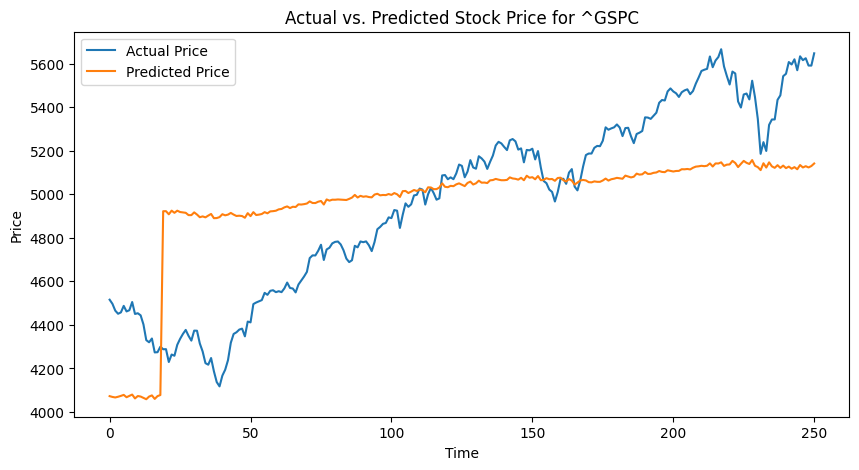

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(y_true.reset_index(drop=True), label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.legend()
plt.title(f"Actual vs. Predicted Stock Price for {DEFAULT_SYMBOL}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.savefig(output_plot_file)
plt.show()